<a href="https://colab.research.google.com/github/50leena/Credit-card-Fraud-detection-system/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline



In [3]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Credit card fraud detection/creditcard.csv")

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [11]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]>

In [14]:
df.shape

(284807, 31)

In [15]:
df.isnull()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [17]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


In [18]:
legit=df[df.Class==0]
fraud=df[df.Class==1]
print(legit.shape,fraud.shape)

(284315, 31) (492, 31)


DATA **SAMPLING**


In [19]:
legit_sample = legit.sample(n=492)

In [20]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
35822,38282.0,-1.887161,1.051353,1.602622,-0.417790,0.575908,-1.045531,0.484299,-0.056776,-0.046967,...,-0.303440,-0.698834,-0.296815,0.365764,0.151256,0.012354,0.060677,0.211232,8.93,0
66070,51866.0,1.022598,-1.385680,1.006666,-0.285909,-1.889379,-0.372674,-0.998376,0.051018,0.145007,...,0.208409,0.282818,-0.148820,0.412085,0.265642,-0.211612,0.015735,0.054507,177.45,0
130393,79345.0,-0.794953,0.766064,1.194398,-1.503626,0.041886,-0.152978,0.273076,0.268485,0.211841,...,-0.070158,-0.164593,-0.033233,-0.286590,-0.294449,0.749058,0.155069,0.114641,4.92,0
55494,46965.0,1.199499,0.258133,0.397414,0.631901,-0.477200,-0.882180,-0.061831,-0.028327,-0.131014,...,-0.231200,-0.739287,0.151192,0.475510,0.134455,0.066839,-0.031282,0.021059,1.29,0
39859,39995.0,1.062200,0.147151,0.052810,1.027208,0.640456,1.149219,-0.018788,0.351809,0.082631,...,0.085264,0.575598,-0.021107,-0.929301,0.536209,-0.148587,0.083286,-0.001193,1.00,0
94214,64783.0,1.402968,-0.368850,-0.182746,-0.766634,-0.614592,-1.090955,-0.154566,-0.242668,-1.352915,...,0.238320,0.564395,-0.173700,0.361381,0.749188,-0.100940,-0.035438,-0.008906,15.00,0
64862,51337.0,-1.840551,1.074372,0.348225,-0.486998,1.324374,0.709237,0.881402,0.421399,-1.061907,...,-0.377256,-1.112480,-0.064143,-1.744688,0.633590,-0.723170,-0.339582,-0.112258,54.00,0
204781,135447.0,1.362544,-1.180722,-1.089309,0.668784,-0.650919,-0.841381,0.399957,-0.386313,0.949185,...,0.266305,0.286368,-0.163277,0.091310,-0.057212,-0.699605,-0.017451,0.021275,344.00,0
137679,82279.0,-0.757840,1.777673,-0.605410,0.917606,-0.150765,-0.811599,0.169629,0.758237,-0.620236,...,0.210948,0.650626,0.160719,0.074880,-0.698625,-0.375126,0.310297,0.160100,0.74,0
121762,76307.0,1.108993,-0.075171,0.755549,0.792685,-0.700757,-0.424681,-0.164446,0.022955,0.233841,...,-0.214413,-0.547525,0.062641,0.570045,0.273646,0.146696,-0.023543,0.014460,35.95,0


In [22]:
new_dataset.shape

(984, 31)

In [23]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [24]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score ,confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#Model Evaluation
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [31]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9542566709021602


In [32]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9086294416243654


Confusion Matrix:
[[94  4]
 [14 85]]


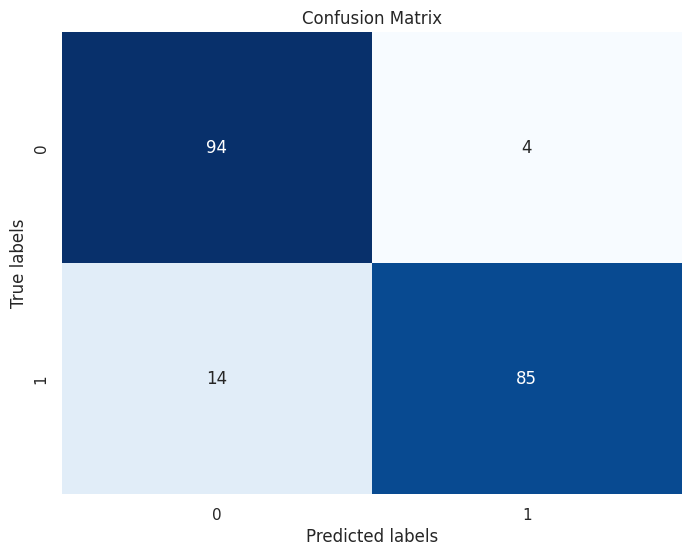

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_test are the true labels and X_test_prediction are the predicted labels
# Replace Y_test and X_test_prediction with your actual true and predicted labels
matrix = confusion_matrix(Y_test, X_test_prediction)

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# matrix = confusion_matrix(Y_test,X_test_prediction )

# print(matrix)


In [35]:
from sklearn.metrics import f1_score, recall_score
recall = recall_score(Y_test,X_test_prediction, average=None)
print(recall[0])
print(recall[1])
precision_class_0 = precision_score(Y_test,X_test_prediction, pos_label=0)
precision_class_1 = precision_score(Y_test, X_test_prediction, pos_label=1)

print("Precision for Class 0:", precision_class_0)
print("Precision for Class 1:", precision_class_1)
from sklearn.metrics import classification_report

print(classification_report(X_test_prediction,Y_test))


0.9591836734693877
0.8585858585858586
Precision for Class 0: 0.8703703703703703
Precision for Class 1: 0.9550561797752809
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       108
           1       0.86      0.96      0.90        89

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [36]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report

print(classification_report(y_pred,Y_test))

Accuracy: 0.8730964467005076
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       121
           1       0.76      0.99      0.86        76

    accuracy                           0.87       197
   macro avg       0.87      0.89      0.87       197
weighted avg       0.90      0.87      0.87       197



Confusion Matrix:
[[97  1]
 [24 75]]


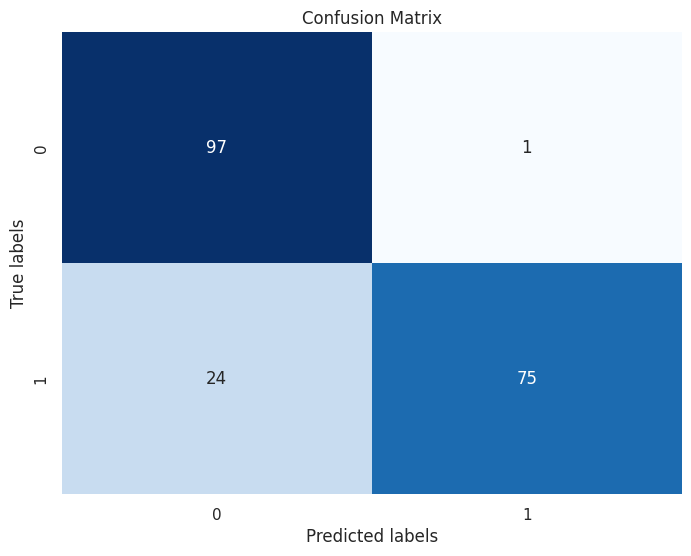

[[97  1]
 [24 75]]


In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_test are the true labels and X_test_prediction are the predicted labels
# Replace Y_test and X_test_prediction with your actual true and predicted labels
matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.43258928571428573, 0.9545454545454546, 'x[14] <= -2.753\ngini = 0.5\nsamples = 787\nvalue = [394, 393]'),
 Text(0.25, 0.8636363636363636, 'x[9] <= 3.019\ngini = 0.023\nsamples = 341\nvalue = [4, 337]'),
 Text(0.34129464285714284, 0.9090909090909092, 'True  '),
 Text(0.22142857142857142, 0.7727272727272727, 'x[4] <= -0.271\ngini = 0.006\nsamples = 338\nvalue = [1, 337]'),
 Text(0.19285714285714287, 0.6818181818181818, 'x[7] <= -0.103\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16428571428571428, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.22142857142857142, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.6818181818181818, 'gini = 0.0\nsamples = 335\nvalue = [0, 335]'),
 Text(0.2785714285714286, 0.7727272727272727, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6151785714285715, 0.8636363636363636, 'x[4] <= 1.864\ngini = 0.22\nsamples = 446\nvalue = [390, 56]'),
 Text(0.5238839285714286, 0.9090909090909092, 

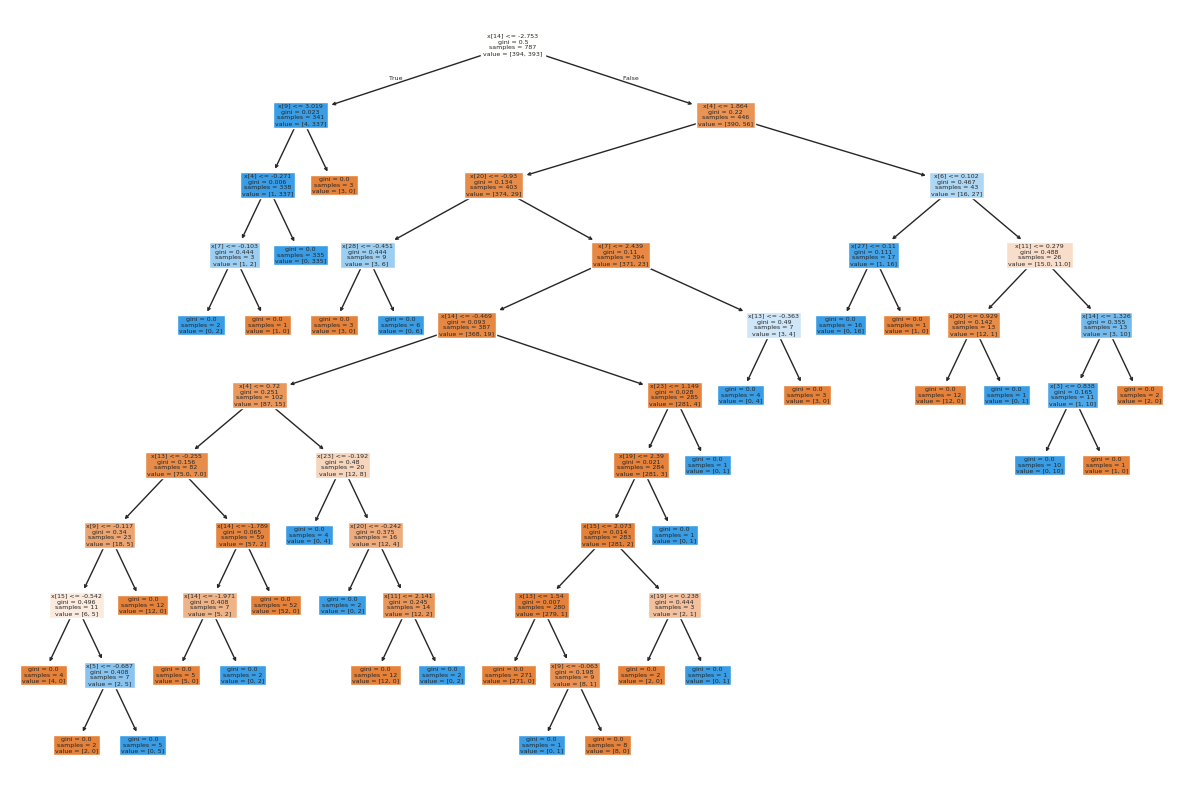

In [40]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [41]:
y_pred = treemodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
score = accuracy_score(y_pred,Y_test)
print(score)

0.8934010152284264


              precision    recall  f1-score   support

           0       0.94      0.86      0.90       107
           1       0.85      0.93      0.89        90

    accuracy                           0.89       197
   macro avg       0.89      0.90      0.89       197
weighted avg       0.90      0.89      0.89       197

Confusion Matrix:
[[92  6]
 [15 84]]


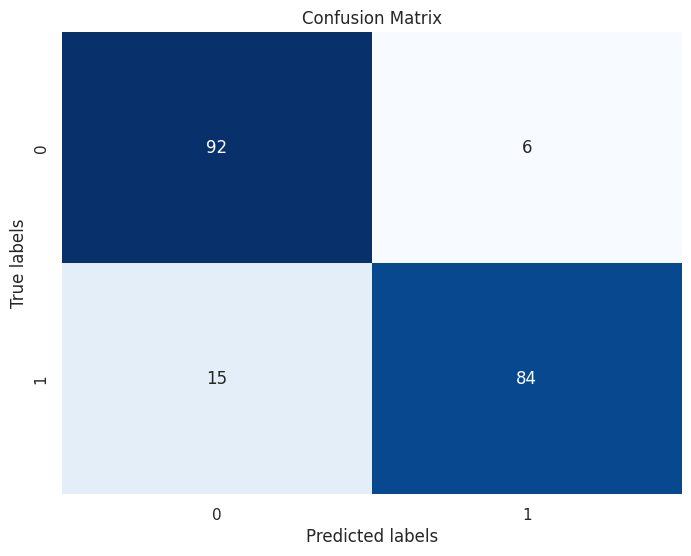

[[92  6]
 [15 84]]


In [43]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


score = accuracy_score(Y_test,y_pred)
print(score)


0.583756345177665


              precision    recall  f1-score   support

           0       0.60      0.58      0.59       102
           1       0.57      0.59      0.58        95

    accuracy                           0.58       197
   macro avg       0.58      0.58      0.58       197
weighted avg       0.58      0.58      0.58       197

Confusion Matrix:
[[59 39]
 [43 56]]


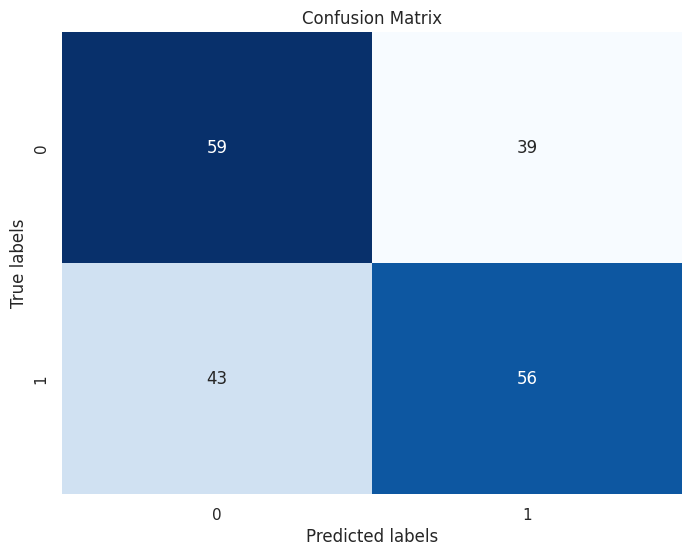

[[59 39]
 [43 56]]


In [47]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, Y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy is: " ,accuracy)
# Evaluating the classifier
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Accuracy is:  0.9238578680203046
Confusion Matrix:
[[97  1]
 [14 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        98
           1       0.99      0.86      0.92        99

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



              precision    recall  f1-score   support

           0       0.99      0.87      0.93       111
           1       0.86      0.99      0.92        86

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix:
[[97  1]
 [14 85]]


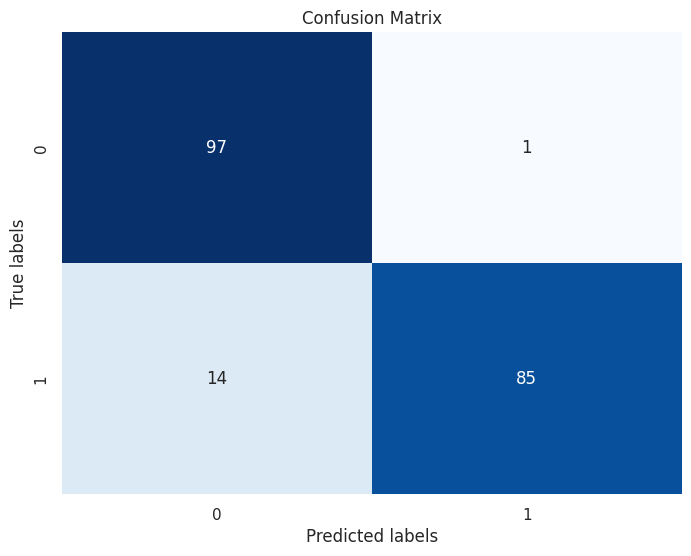

[[97  1]
 [14 85]]


In [50]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

OverSAMPLINg

In [56]:
df_legit = legit.sample(n=20000)

In [57]:
df_legit.shape

(20000, 31)

In [58]:
new_data_over = pd.concat([df_legit,fraud],axis=0)
new_data_over.shape

(20492, 31)

In [59]:
X = new_data_over.drop(columns='Class', axis=1)
Y = new_data_over['Class']
print(X.shape,Y.shape)

(20492, 30) (20492,)


In [60]:
from imblearn.over_sampling import SMOTE
resampled_x, resampled_y = SMOTE().fit_resample(X,Y) # reshaping data

print('X New Shape: ', resampled_x.shape)
print('Y New Shape: ', resampled_y.shape)

X New Shape:  (40000, 30)
Y New Shape:  (40000,)


In [61]:
(X_train,X_test,Y_train,Y_test) = train_test_split(resampled_x, resampled_y, test_size=0.2)

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(20492, 30) (32000, 30) (8000, 30)


In [63]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.97225


In [65]:
from sklearn.metrics import classification_report

print(classification_report(X_test_prediction,Y_test))
matrix = confusion_matrix(Y_test,X_test_prediction )

print(matrix)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4100
           1       0.96      0.98      0.97      3900

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

[[3951   73]
 [ 149 3827]]


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report

print(classification_report(y_pred,Y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,Y_train)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred = treemodel.predict(X_test)
from sklearn.metrics import classification_report
score = accuracy_score(y_pred,Y_test)
print(score)

In [ ]:
print(classification_report(y_pred,Y_test))
matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(Y_test,y_pred)
cm
score = accuracy_score(Y_test,y_pred)
print(score)
print(classification_report(Y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, Y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy is: " ,accuracy)
# Evaluating the classifier
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

In [ ]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)